<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/BI0008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://media.githubusercontent.com/media/RaffelRavionaldo/Home-Credit-Indonesia-Score-Card/refs/heads/main/application_train.csv

--2024-11-14 05:27:26--  https://media.githubusercontent.com/media/RaffelRavionaldo/Home-Credit-Indonesia-Score-Card/refs/heads/main/application_train.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166133370 (158M) [text/plain]
Saving to: ‘application_train.csv’

application_train.c 100%[===================>] 158.44M  91.0MB/s    in 1.7s    

2024-11-14 05:27:31 (91.0 MB/s) - ‘application_train.csv’ saved [166133370/166133370]



In [2]:
#!curl -O maxhalford.github.io/files/datasets/creditcardfraud.zip

In [3]:
!wget https://maxhalford.github.io/files/datasets/creditcardfraud.zip

--2024-11-14 05:27:32--  https://maxhalford.github.io/files/datasets/creditcardfraud.zip
Resolving maxhalford.github.io (maxhalford.github.io)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to maxhalford.github.io (maxhalford.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditcardfraud.zip’

creditcardfraud.zip 100%[===================>]  65.95M  81.6MB/s    in 0.8s    

2024-11-14 05:27:34 (81.6 MB/s) - ‘creditcardfraud.zip’ saved [69155672/69155672]



In [4]:
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [5]:
!unzip -q "/content/creditcardfraud.zip"

In [6]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv('creditcard.csv')
X = df.drop(columns='Class')
y = df['Class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42
)

X_fit, X_val, y_fit, y_val = model_selection.train_test_split(
    X_train, y_train,
    random_state=42
)

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
83225,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,...,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42
52800,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,...,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20
21293,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,...,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95
133600,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,...,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00
38225,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,...,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00


In [7]:
import lightgbm
from sklearn import metrics

fit = lightgbm.Dataset(X_fit, y_fit)
val = lightgbm.Dataset(X_val, y_val, reference=fit)

model = lightgbm.train(
    params={
        'learning_rate': 0.01,
        'objective': 'binary'
    },
    train_set=fit,
    num_boost_round=10000,
    valid_sets=(fit, val),
    valid_names=('fit', 'val'),
    callbacks=[
        lightgbm.early_stopping(stopping_rounds=20),
        lightgbm.log_evaluation(100)  # Use log_evaluation for verbose output
    ]
)

y_pred = model.predict(X_test)

print()
print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 283, number of negative: 159920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 160203, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001767 -> initscore=-6.336982
[LightGBM] [Info] Start training from score -6.336982
Training until validation scores don't improve for 20 rounds
[100]	fit's binary_logloss: 0.0018981	val's binary_logloss: 0.0035569
[200]	fit's binary_logloss: 0.00080822	val's binary_logloss: 0.00283644
[300]	fit's binary_logloss: 0.000396519	val's binary_logloss: 0.00264941
Early stopping, best iteration is:
[352]	fit's binary_logloss: 0.000281286	val's binary_logloss: 0.00261413

Test's ROC AUC: 0.97772
Test's logloss: 0.00237


In [8]:
from scipy import special

def logloss_objective(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)
    grad = p - y
    hess = p * (1 - p)
    return grad, hess

In [9]:
import numpy as np

def logloss_metric(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)

    ll = np.empty_like(p)
    pos = y == 1
    ll[pos] = np.log(p[pos])
    ll[~pos] = np.log(1 - p[~pos])

    is_higher_better = False
    return 'logloss', -ll.mean(), is_higher_better

In [10]:
# import lightgbm
# from scipy import special
# import numpy as np
# from sklearn import metrics
#
# model = lightgbm.train(
#     params={'learning_rate': 0.01},
#     train_set=fit,
#     num_boost_round=10000,
#     valid_sets=(fit, val),
#     valid_names=('fit', 'val'),
#     # Use callbacks instead of early_stopping_rounds and verbose_eval
#     callbacks=[
#         lightgbm.early_stopping(stopping_rounds=20),  # Early stopping
#         lightgbm.log_evaluation(100)  # Verbose output every 100 iterations
#     ],
#     # Notice the two following parameters
#     fobj=logloss_objective,
#     feval=logloss_metric
# )
#
# # Notice how we use a sigmoid here to obtain probabilities
# y_pred = special.expit(model.predict(X_test))
#
# print()
# print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
# print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")

In [11]:
import lightgbm
from scipy import special
import numpy as np
from sklearn import metrics

# Define the custom objective function
def logloss_objective(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)
    grad = p - y
    hess = p * (1 - p)
    return grad, hess

# Define the custom metric function
def logloss_metric(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)

    ll = np.empty_like(p)
    pos = y == 1
    ll[pos] = np.log(p[pos])
    ll[~pos] = np.log(1 - p[~pos])

    is_higher_better = False
    return 'logloss', -ll.mean(), is_higher_better

# Pass the custom objective function through the params dictionary
model = lightgbm.train(
    params={'learning_rate': 0.01, 'objective': logloss_objective}, # Pass objective here
    train_set=fit,
    num_boost_round=10000,
    valid_sets=(fit, val),
    valid_names=('fit', 'val'),
    # Use callbacks instead of early_stopping_rounds and verbose_eval
    callbacks=[
        lightgbm.early_stopping(stopping_rounds=20),  # Early stopping
        lightgbm.log_evaluation(100)  # Verbose output every 100 iterations
    ],
    feval=logloss_metric # feval is still a valid argument
)

# Notice how we use a sigmoid here to obtain probabilities
y_pred = special.expit(model.predict(X_test))

print()
print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")

[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 160203, number of used features: 30
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 20 rounds
[100]	fit's logloss: 0.203632	val's logloss: 0.203803
[200]	fit's logloss: 0.0709961	val's logloss: 0.0712959
[300]	fit's logloss: 0.0263333	val's logloss: 0.0267926
[400]	fit's logloss: 0.0103193	val's logloss: 0.0110446
[500]	fit's logloss: 0.00419716	val's logloss: 0.00541233
[600]	fit's logloss: 0.00181725	val's logloss: 0.00341563
[700]	fit's logloss: 0.000777108	val's logloss: 0.00277328
[800]	fit's logloss: 0.000378409	val's logloss: 0.00259164
Early stopping, best iteration is:
[874]	fit's logloss: 0.000237358	val's logloss

In [12]:
import lightgbm
import numpy as np
import pandas as pd
from scipy import special
from sklearn import metrics
from sklearn import model_selection

def logloss_init_score(y):
    p = y.mean()
    p = np.clip(p, 1e-15, 1 - 1e-15)
    log_odds = np.log(p / (1 - p))
    return log_odds

def logloss_objective(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)
    grad = p - y
    hess = p * (1 - p)
    return grad, hess

def logloss_metric(preds, train_data):
    y = train_data.get_label()
    p = special.expit(preds)
    is_higher_better = False
    return 'logloss', metrics.log_loss(y, p), is_higher_better

df = pd.read_csv('creditcard.csv')
X = df.drop(columns='Class')
y = df['Class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42
)

X_fit, X_val, y_fit, y_val = model_selection.train_test_split(
    X_train, y_train,
    random_state=42
)

fit = lightgbm.Dataset(
    X_fit, y_fit,
    init_score=np.full_like(y_fit, logloss_init_score(y_fit), dtype=float)
)

val = lightgbm.Dataset(
    X_val, y_val,
    init_score=np.full_like(y_val, logloss_init_score(y_fit), dtype=float),
    reference=fit
)

# Pass the custom objective function through the params dictionary
model = lightgbm.train(
    params={'learning_rate': 0.01, 'objective': logloss_objective}, # Pass objective here
    train_set=fit,
    num_boost_round=10000,
    valid_sets=(fit, val),
    valid_names=('fit', 'val'),
    # Use callbacks instead of early_stopping_rounds and verbose_eval
    callbacks=[
        lightgbm.early_stopping(stopping_rounds=20),  # Early stopping
        lightgbm.log_evaluation(100)  # Verbose output every 100 iterations
    ],
    feval=logloss_metric # feval is still a valid argument
)

y_pred = special.expit(logloss_init_score(y_fit) + model.predict(X_test))

print()
print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")

[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 160203, number of used features: 30
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 20 rounds
[100]	fit's logloss: 0.0018981	val's logloss: 0.0035569
[200]	fit's logloss: 0.00080822	val's logloss: 0.00283644
[300]	fit's logloss: 0.000396519	val's logloss: 0.00264941
Early stopping, best iteration is:
[352]	fit's logloss: 0.000281286	val's logloss: 0.00261413

Test's ROC AUC: 0.97772
Test's logloss: 0.00237


In [13]:
import numpy as np
from scipy import optimize
from scipy import special

class FocalLoss:

    def __init__(self, gamma, alpha=None):
        self.alpha = alpha
        self.gamma = gamma

    def at(self, y):
        if self.alpha is None:
            return np.ones_like(y)
        return np.where(y, self.alpha, 1 - self.alpha)

    def pt(self, y, p):
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return np.where(y, p, 1 - p)

    def __call__(self, y_true, y_pred):
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        return -at * (1 - pt) ** self.gamma * np.log(pt)

    def grad(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma
        return at * y * (1 - pt) ** g * (g * pt * np.log(pt) + pt - 1)

    def hess(self, y_true, y_pred):
        y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
        at = self.at(y_true)
        pt = self.pt(y_true, y_pred)
        g = self.gamma

        u = at * y * (1 - pt) ** g
        du = -at * y * g * (1 - pt) ** (g - 1)
        v = g * pt * np.log(pt) + pt - 1
        dv = g * np.log(pt) + g + 1

        return (du * v + u * dv) * y * (pt * (1 - pt))

    def init_score(self, y_true):
        res = optimize.minimize_scalar(
            lambda p: self(y_true, p).sum(),
            bounds=(0, 1),
            method='bounded'
        )
        p = res.x
        log_odds = np.log(p / (1 - p))
        return log_odds

    def lgb_obj(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        return self.grad(y, p), self.hess(y, p)

    def lgb_eval(self, preds, train_data):
        y = train_data.get_label()
        p = special.expit(preds)
        is_higher_better = False
        return 'focal_loss', self(y, p).mean(), is_higher_better

In [14]:
def check_gradient(func, grad, values, eps=1e-8):
    approx = (func(values + eps) - func(values - eps)) / (2 * eps)
    return np.linalg.norm(approx - grad(values))

In [15]:
np.random.seed(42)
y_true = np.random.uniform(0, 1, 100) > .5
y_pred = np.random.uniform(0, 1, 100)

In [16]:
fl = FocalLoss(alpha=.3, gamma=2)

check_gradient(
    func=lambda x: fl(y_true, x),
    grad=lambda x: fl.grad(y_true, x) / (x * (1 - x)),
    values=y_pred
)

2.3954956968511336e-07

In [17]:
for gamma in [0, 1, 2, 3]:
    for alpha in [.1, .3, .5, .7, .9]:
        fl = FocalLoss(alpha=alpha, gamma=gamma)
        diff = check_gradient(
            func=lambda x: fl(y_true, x),
            grad=lambda x: fl.grad(y_true, x) / (x * (1 - x)),
            values=y_pred
        )
        assert diff < 1e-6

In [18]:
for gamma in [0, 1, 2, 3]:
    for alpha in [.1, .3, .5, .7, .9]:
        fl = FocalLoss(alpha=alpha, gamma=gamma)
        diff = check_gradient(
            func=lambda x: fl.grad(y_true, x),
            grad=lambda x: fl.hess(y_true, x) / (x * (1 - x)),
            values=y_pred
        )
        assert diff < 1e-6

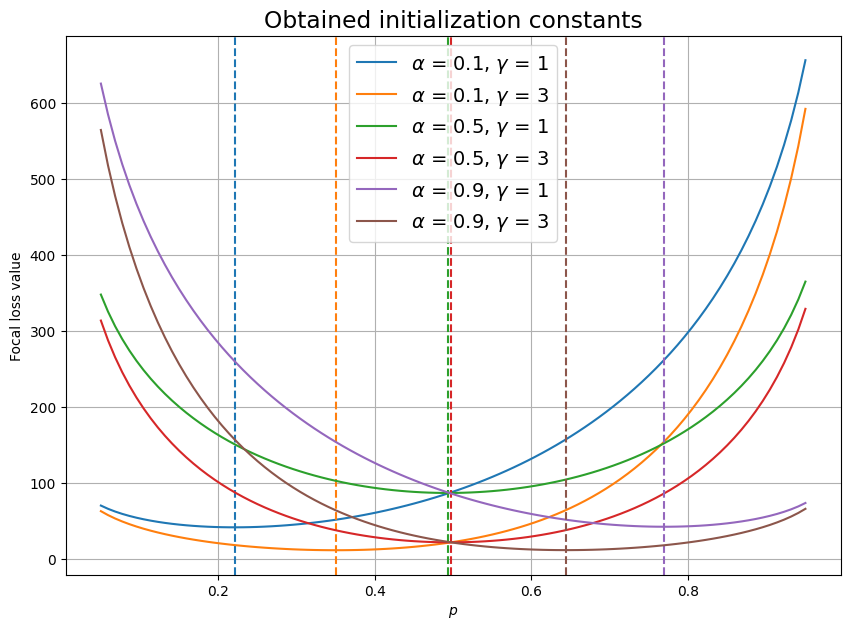

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from scipy import special

fig, ax = plt.subplots(figsize=(10, 7))
matplotlib.rc('font', size=14)

np.random.seed(10)
y = np.random.randint(2, size=500)  # random 0s and 1s

for alpha in [.1, .5, .9]:
    for gamma in [1, 3]:
        fl = FocalLoss(alpha=alpha, gamma=gamma)
        ps = np.linspace(5e-2, 1 - 5e-2, 100)
        ls = [fl(y, p).sum() for p in ps]

        curve = ax.plot(ps, ls, label=r'$\alpha$ = %s, $\gamma$ = %s' % (alpha, gamma))[0]
        p = special.expit(fl.init_score(y))
        ax.axvline(p, color=curve.get_color(), linestyle='--')

ax.legend()
ax.grid()
ax.set_title('Obtained initialization constants')
ax.set_xlabel(r'$p$')
ax.set_ylabel('Focal loss value')
fig.savefig('focal_loss_min.png')

In [20]:
import lightgbm
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import special
from sklearn import metrics
from sklearn import model_selection

df = pd.read_csv('creditcard.csv')
X = df.drop(columns='Class')
y = df['Class']

fl = FocalLoss(alpha=None, gamma=0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    random_state=42
)

X_fit, X_val, y_fit, y_val = model_selection.train_test_split(
    X_train, y_train,
    random_state=42
)

fit = lightgbm.Dataset(
    X_fit, y_fit,
    init_score=np.full_like(y_fit, fl.init_score(y_fit), dtype=float)
)

val = lightgbm.Dataset(
    X_val, y_val,
    init_score=np.full_like(y_val, fl.init_score(y_fit), dtype=float),
    reference=fit
)

# Pass the custom objective function through the params dictionary
model = lightgbm.train(
    params={'learning_rate': 0.01, 'objective': fl.lgb_obj}, # Pass objective here
    train_set=fit,
    num_boost_round=10000,
    valid_sets=(fit, val),
    valid_names=('fit', 'val'),
    # Use callbacks instead of early_stopping_rounds and verbose_eval
    callbacks=[
        lightgbm.early_stopping(stopping_rounds=20),  # Early stopping
        lightgbm.log_evaluation(100)  # Verbose output every 100 iterations
    ],
    feval=fl.lgb_eval # feval is still a valid argument
)


y_pred = special.expit(fl.init_score(y_fit) + model.predict(X_test))

print()
print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")

[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 160203, number of used features: 30
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 20 rounds
[100]	fit's focal_loss: 0.00190475	val's focal_loss: 0.00356043
[200]	fit's focal_loss: 0.000811846	val's focal_loss: 0.00285806
[300]	fit's focal_loss: 0.000401933	val's focal_loss: 0.00267161
Early stopping, best iteration is:
[345]	fit's focal_loss: 0.000297174	val's focal_loss: 0.00263719

Test's ROC AUC: 0.97948
Test's logloss: 0.00237


https://maxhalford.github.io/blog/lightgbm-focal-loss/#motivation

Multiclass Focal Loss

In [21]:
preds = np.random.rand(100*4)

In [22]:
preds[120]

0.27252617599113516

In [23]:
preds.reshape(-1 , 4, order='F')[20, 1]

0.27252617599113516

In [24]:
np.all(preds[:100] == preds.reshape(-1 , 4, order='F')[:100,0])

True

In [25]:
def focal_loss_lgb(y_pred, dtrain, alpha, gamma, num_class):
    """
    Focal Loss for lightgbm

    Parameters:
    -----------
    y_pred: numpy.ndarray
        array with the predictions
    dtrain: lightgbm.Dataset
    alpha, gamma: float
        See original paper https://arxiv.org/pdf/1708.02002.pdf
    num_class: int
        number of classes
    """
    a,g = alpha, gamma
    y_true = dtrain.label
    # n observations x num_class arrays
    y_true = np.eye(num_class)[y_true.astype('int')]
    y_pred = y_pred.reshape(-1,num_class, order='F')
    # alpha and gamma multiplicative factors with BCEWithLogitsLoss
    def fl(x,t):
        p = 1/(1+np.exp(-x))
        return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
    partial_fl = lambda x: fl(x, y_true)
    grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
    hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
    # flatten in column-major (Fortran-style) order
    return grad.flatten('F'), hess.flatten('F')

In [26]:
def focal_loss_lgb_eval_error(y_pred, dtrain, alpha, gamma, num_class):
    """
    Focal Loss for lightgbm

    Parameters:
    -----------
    y_pred: numpy.ndarray
        array with the predictions
    dtrain: lightgbm.Dataset
    alpha, gamma: float
        See original paper https://arxiv.org/pdf/1708.02002.pdf
    num_class: int
        number of classes
    """
    a,g = alpha, gamma
    y_true = dtrain.label
    y_true = np.eye(num_class)[y_true.astype('int')]
    y_pred = y_pred.reshape(-1, num_class, order='F')
    p = 1/(1+np.exp(-y_pred))
    loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
    # a variant can be np.sum(loss)/num_class
    return 'focal_loss', np.mean(loss), False

In [27]:
import numpy as np
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from scipy.misc import derivative


digits = datasets.load_digits()
X = digits.data
y = digits.target

In [28]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
lgbtrain = lgb.Dataset(X_tr, y_tr, free_raw_data=True)
lgbeval = lgb.Dataset(X_val, y_val)

In [29]:
import numpy as np
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.misc import derivative


digits = datasets.load_digits()
X = digits.data
y = digits.target

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
lgbtrain = lgb.Dataset(X_tr, y_tr, free_raw_data=True)
lgbeval = lgb.Dataset(X_val, y_val)

# Define focal loss and evaluation function
focal_loss = lambda x, y: focal_loss_lgb(x, y, 0.25, 2., 10)
eval_error = lambda x, y: focal_loss_lgb_eval_error(x, y, 0.25, 2., 10)

# Update params dictionary to include objective and metric
params = {
    'learning_rate': 0.1,
    'num_boost_round': 10,
    'num_class': 10,
    'objective': focal_loss, # Pass focal_loss as the objective function
    'metric': 'custom', # Use 'custom' metric for the evaluation function
}

# Train the model
model = lgb.train(
    params,
    lgbtrain,
    valid_sets=[lgbeval],
    feval=eval_error # Pass eval_error as the evaluation function
)

[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 1437, number of used features: 53
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
<ipython-input-25-f4eeef46f75e>:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
<ipython-input-25-f4eeef46f75e>:26: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
